### 1.Importing the Relevant Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###  2.Reading Data

In [2]:
df = pd.read_csv("WindTunnel.csv")
df

,Freqency,Velocity
0,7.5,1.65
1,10.0,2.36
2,15.0,3.61
3,20.0,5.14
4,25.0,6.90
5,30.0,8.25
6,35.0,9.65
7,40.0,10.97
8,45.0,12.27
9,50.0,13.61


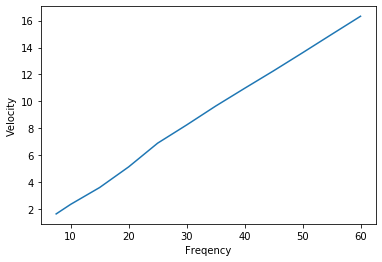

In [3]:
df = pd.read_csv("WindTunnel.csv")
plt.xlabel('Freqency')
plt.ylabel('Velocity')
plt.plot(df.Freqency,df.Velocity)


In [5]:
reg = linear_model.LinearRegression()
reg.fit(df[["Freqency"]],df.Velocity)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
reg.predict([[65.0]])

array([17.88094842])

In [7]:
L=0.2
r=0.1
v=3.45
A=0.0323


CL = (2*L)/(r*(v**2)*A)
CL

10.404453626374767

In [8]:
df = pd.read_csv("WindTunnel1.csv")

In [9]:
df

,Velocity,Lift,Area,Dencity
0,3.45,0.2,0.0323,0.10
1,4.50,0.3,0.0323,0.13
2,4.80,0.4,0.0323,0.15
3,5.00,0.5,0.0323,0.18
4,6.20,0.6,0.0323,0.21
5,6.50,0.7,0.0323,0.25
6,7.40,0.8,0.0323,0.29


In [10]:
df1 = df.copy()

In [11]:
df1["Coef_lift"] = (2*df['Lift'])/(df['Dencity']*df['Area']*(df['Velocity']**2))

In [12]:
df1

,Velocity,Lift,Area,Dencity,Coef_lift
0,3.45,0.2,0.0323,0.10,10.404454
1,4.50,0.3,0.0323,0.13,7.056354
2,4.80,0.4,0.0323,0.15,7.166609
3,5.00,0.5,0.0323,0.18,6.879945
4,6.20,0.6,0.0323,0.21,4.602312
5,6.50,0.7,0.0323,0.25,4.103541
6,7.40,0.8,0.0323,0.29,3.119292


In [13]:
X = df1.drop(['Coef_lift'],axis='columns')

In [14]:
y = df1.Coef_lift

###  Data Pre-process 

In [19]:

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2,random_state = 10)

In [28]:


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_valid)


In [30]:
algos = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),RandomForestRegressor()]

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 'RandomForestRegressor']

rmse_list = []


In [31]:
for name in algos:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    MSE= metrics.mean_squared_error(y_valid,y_pred)
    rmse = np.sqrt(MSE)
    rmse_list.append(rmse)

C:\Users\hp\.conda\envs\new\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
evaluation = pd.DataFrame({'Model': names,
                           'RMSE': rmse_list})

evaluation

,Model,RMSE
0,Linear Regression,18.383783
1,Ridge Regression,5.258760
2,Lasso Regression,5.836502
3,K Neighbors Regressor,2.499087
4,Decision Tree Regressor,2.666898
5,RandomForestRegressor,2.025936


### Building Model
 

In [48]:

clf =  Ridge()
clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [49]:
clf.score(X_test,y_test)

0.9598302171439855

In [35]:
clf.predict([[6.8,0.74,0.0323,0.27]])

array([-15.31680087])